In [1]:
import numpy as np
import pandas as pd
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import tensorflow as tf

In [2]:
files = glob.glob('*.csv')


In [3]:
dfs = []
for file in files:
    if file != 'extraterrestrial data.csv':
        df = pd.read_csv(file)
        dfs.append(df)

In [4]:
data=pd.concat(dfs)

In [5]:
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),Orientation,Lats,Longs,[1] Dry Bulb Temperature (C),[1] Global Horizontal Radiation (Wh/m2),[1] Relative Humidity (),DNR,SC,hdi
0,Year 1 Jan 01 01:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,0,23.0225,72.5714,13.7,0,58,0,0,0
1,Year 1 Jan 01 02:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,0,23.0225,72.5714,13.5,0,64,0,0,0
2,Year 1 Jan 01 03:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,0,23.0225,72.5714,13.0,0,70,0,0,0
3,Year 1 Jan 01 04:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,0,23.0225,72.5714,12.2,0,75,0,0,0
4,Year 1 Jan 01 05:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,0,23.0225,72.5714,11.4,0,80,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,Year 1 Dec 31 19:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,90,22.7196,75.8577,20.7,0,39,0,0,0
8755,Year 1 Dec 31 20:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,90,22.7196,75.8577,17.6,0,48,0,0,0
8756,Year 1 Dec 31 21:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,90,22.7196,75.8577,15.5,0,58,0,0,0
8757,Year 1 Dec 31 22:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,90,22.7196,75.8577,14.1,0,65,0,0,0


In [6]:
data.dtypes

Date/Time                                                  object
[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)    float64
[1] Site Direct Solar Radiation Rate per Area  (W/m2)     float64
[1] Site Outdoor Air Dewpoint Temperature  (C)            float64
[1] Site Outdoor Air Drybulb Temperature  (C)             float64
[1] Site Solar Altitude Angle  (deg)                      float64
[1] Site Solar Azimuth Angle  (deg)                       float64
[1] Site Wind Direction  (deg)                            float64
[1] Site Wind Speed  (m/s)                                float64
[1] Surface Outside Face Temperature  (C)                 float64
Orientation                                                 int64
Lats                                                      float64
Longs                                                     float64
[1] Dry Bulb Temperature (C)                              float64
[1] Global Horizontal Radiation (Wh/m2)                     int64
[1] Relati

In [7]:
import pandas as pd

# Assuming data_a0 is your DataFrame
data['Date/Time'] = pd.to_datetime(data['Date/Time'].str.replace('Year 1 ', '2002'), format="%Y%b %d %H:%M")


In [8]:
%pip install ephem

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [9]:
import numpy as np
import pandas as pd

# Assuming you have the DataFrame 'data' with the given columns
# Set observer's latitude and longitude
lstm = 15 * 5.5  # Local Standard Time Meridian for India

# Calculate the day of the year from the 'Date/Time' column
data['Date/Time'] = pd.to_datetime(data['Date/Time'])
data['day'] = data['Date/Time'].dt.dayofyear

# Calculate Equation of Time (EoT)
B = 360 / 365 * (data['day'] - 81)
eot = 9.87 * np.sin(2 * np.radians(B)) - 7.53 * np.cos(np.radians(B)) - 1.5 * np.sin(np.radians(B))

# Calculate Time Correction (TC)
tc = 4 * (data['Longs'] - lstm) + eot

# Convert 'Date/Time' to local time (Local Standard Time, LST)
data['Local Time'] = data['Date/Time'] + pd.to_timedelta(tc, unit='m')

# Calculate Hour Angle (HRA)
data['hra'] = 15 * (data['Local Time'].dt.hour + data['Local Time'].dt.minute / 60 - 12)




In [10]:

# Assuming data['day'], data['Lats'], data['hra'], and data['[1] Site Solar Altitude Angle  (deg)'] are available

# Calculate declination
day_angle = 360 * (284 + data['day']) / 365
data['declination'] = 23.45 * np.sin(np.radians(day_angle))

# Assuming data['Lats'] represents latitude
latitude = data['Lats']

# Assuming data['hra'] represents hour angle
hour_angle = data['hra']

# Calculate solar zenith angle
data['solar_zenith'] = 90 - data['[1] Site Solar Altitude Angle  (deg)']


In [11]:
def solar_altitude_angle(LAT, delta, H):

    # Convert degrees to radians
    LAT_rad = np.radians(LAT)
    delta_rad = np.radians(delta)
    H_rad = np.radians(H)
    
    # Calculate solar elevation angle
    beta_rad = np.arcsin(np.sin(LAT_rad) * np.sin(delta_rad) + np.cos(LAT_rad) * np.cos(delta_rad) * np.cos(H_rad))
    beta_deg = np.degrees(beta_rad)
    
    return beta_deg

# Assuming your DataFrame is named 'data'
# Extract required columns
LAT = data['Lats']
delta = data['declination']
H = data['hra']

# Calculate solar elevation angle
data['Solar Altitde Angle'] = solar_altitude_angle(LAT, delta, H)

In [12]:


# Define a function to calculate solar azimuth angle for a single row
def calculate_single_solar_azimuth(local_hour, declination, latitude, hra):
    if local_hour < 12:
        return np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))
    else:
        return 360 - np.degrees(np.arccos((np.sin(np.radians(declination)) * np.cos(np.radians(latitude)) - np.cos(np.radians(declination)) * np.sin(np.radians(latitude)) * np.cos(np.radians(hra)))))

# Vectorized calculation of solar azimuth angle
data['solar_azimuth'] = np.where(data['Local Time'].dt.hour < 12,
                                  np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))),
                                  360 - np.degrees(np.arccos((np.sin(np.radians(data['declination'])) * np.cos(np.radians(latitude)) - np.cos(np.radians(data['declination'])) * np.sin(np.radians(latitude)) * np.cos(np.radians(data['hra']))))))


In [13]:
data['Wall Azimuth'] = data['Orientation'].replace({0: 180, 180: 0, 90: 270, 270: 90})

data['AOI'] = np.degrees(np.arccos(np.sin(np.radians(data['solar_zenith'])) * np.cos(np.radians(data['[1] Site Solar Azimuth Angle  (deg)']-data['Wall Azimuth']))))


In [14]:
def calculate_IRH(Tdb_C, Tdp_C):
    # Convert temperatures to Kelvin
    Tdb_K = Tdb_C + 273.15  # Drybulb temperature in Kelvin
    Tdp_K = Tdp_C + 273.15  # Dewpoint temperature in Kelvin
    
    # Calculate sky emissivity (ϵsky) using the correlation from Clark & Allen (1978)
    ϵsky_clear = 0.787 + 0.764 * np.log(Tdp_K / 273)
    
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate the rate of infrared radiation emitted from the sky (IRH)
    IRH = ϵsky_clear * sigma * Tdb_K**4
    return IRH

# Example usage:
Tdb_data_C = data['[1] Site Outdoor Air Drybulb Temperature  (C)']  # Drybulb temperature in Celsius
Tdp_data_C = data['[1] Site Outdoor Air Dewpoint Temperature  (C)']  # Dewpoint temperature in Celsius

IRH_data = calculate_IRH(Tdb_data_C, Tdp_data_C)
def calculate_Tsky(IRH):
    # Stefan-Boltzmann constant in W/(m^2 K^4)
    sigma = 5.6697e-8
    
    # Calculate sky temperature (Tsky) using the formula
    Tsky = (IRH / sigma)**0.25 - 273.15
    return Tsky

# Example usage:
 # Rate of infrared radiation emitted from the sky in W/m^2

Tsky_data = calculate_Tsky(IRH_data)
data['Tsky'] = Tsky_data

In [15]:
data['Calc_total_E']=data['DNR']*np.cos(np.radians(data['AOI']))+data['hdi']*0.5

In [16]:
data['H']=12.49+4.065*data['[1] Site Wind Speed  (m/s)']+0.028*data['[1] Site Wind Speed  (m/s)']**2

In [17]:
data['E/H']=data['Calc_total_E']/data['H']
data['t_longwave']=(data['[1] Site Outdoor Air Drybulb Temperature  (C)']-data['Tsky'])/data['H']
data

,Date/Time,[1] Site Diffuse Solar Radiation Rate per Area (W/m2),[1] Site Direct Solar Radiation Rate per Area (W/m2),[1] Site Outdoor Air Dewpoint Temperature (C),[1] Site Outdoor Air Drybulb Temperature (C),[1] Site Solar Altitude Angle (deg),[1] Site Solar Azimuth Angle (deg),[1] Site Wind Direction (deg),[1] Site Wind Speed (m/s),[1] Surface Outside Face Temperature (C),...,solar_zenith,Solar Altitde Angle,solar_azimuth,Wall Azimuth,AOI,Tsky,Calc_total_E,H,E/H,t_longwave
0,2002-01-01 01:00:00,0.0,0.0,5.600,14.075,-86.550209,91.104045,220.00,2.925,17.425801,...,176.550209,-86.318545,90.039378,180,89.933569,-1.261456,0.0,24.619682,0.0,0.622935
1,2002-01-01 02:00:00,0.0,0.0,6.500,13.550,-75.710457,93.157099,180.00,1.725,17.436224,...,165.710457,-72.524979,91.112878,180,89.221128,-1.550557,0.0,19.585442,0.0,0.771009
2,2002-01-01 03:00:00,0.0,0.0,7.400,13.125,-61.958056,96.159063,45.00,0.350,17.430286,...,151.958056,-58.779093,93.517420,180,87.108861,-1.746754,0.0,13.916180,0.0,1.068666
3,2002-01-01 04:00:00,0.0,0.0,7.825,12.400,-48.286846,99.382686,0.00,0.375,17.410444,...,138.286846,-45.124571,97.101033,180,83.772356,-2.337255,0.0,14.018313,0.0,1.051286
4,2002-01-01 05:00:00,0.0,0.0,7.975,11.600,-34.749348,102.923038,0.00,0.875,17.374948,...,124.749348,-31.616816,101.652816,180,79.411373,-3.061945,0.0,16.068313,0.0,0.912476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8754,2002-12-31 19:00:00,0.0,0.0,6.325,21.350,-12.176278,249.653350,3.75,0.025,23.663594,...,102.176278,-15.200531,251.620438,270,23.578469,5.797189,0.0,12.591643,0.0,1.235169
8755,2002-12-31 20:00:00,0.0,0.0,6.550,18.375,-25.321975,254.015331,0.00,0.000,22.149918,...,115.321975,-28.435106,256.954718,270,29.660956,3.032017,0.0,12.490000,0.0,1.228421
8756,2002-12-31 21:00:00,0.0,0.0,7.050,16.025,-38.737982,257.722237,30.75,0.000,20.445485,...,128.737982,-41.912800,261.639714,270,40.343649,0.921642,0.0,12.490000,0.0,1.209236
8757,2002-12-31 22:00:00,0.0,0.0,7.575,14.450,-52.333160,260.924964,87.50,0.525,19.256711,...,142.333160,-55.551205,265.422170,270,52.884766,-0.450397,0.0,14.631843,0.0,1.018354


In [18]:
data.columns

Index(['Date/Time', '[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
       '[1] Surface Outside Face Temperature  (C)', 'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'DNR', 'SC', 'hdi', 'day', 'Local Time', 'hra', 'declination',
       'solar_zenith', 'Solar Altitde Angle', 'solar_azimuth', 'Wall Azimuth',
       'AOI', 'Tsky', 'Calc_total_E', 'H', 'E/H', 't_longwave'],
      dtype='object')

In [19]:
X = data.drop(['[1] Site Diffuse Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Direct Solar Radiation Rate per Area  (W/m2)',
       '[1] Site Outdoor Air Dewpoint Temperature  (C)',
       '[1] Site Solar Altitude Angle  (deg)',
       '[1] Site Solar Azimuth Angle  (deg)', '[1] Site Wind Direction  (deg)',
       '[1] Site Wind Speed  (m/s)',
        'Orientation', 'Lats',
       'Longs', '[1] Dry Bulb Temperature (C)',
       '[1] Global Horizontal Radiation (Wh/m2)', '[1] Relative Humidity ()',
       'DNR', 'SC', 'hdi', 'day', 'Local Time', 'hra', 'declination',
       'solar_zenith', 'Solar Altitde Angle', 'solar_azimuth', 'Wall Azimuth',
       'AOI', 'Tsky', 'Calc_total_E', 'H'], axis = 1)
Y = data['[1] Surface Outside Face Temperature  (C)']

X.columns

Index(['Date/Time', '[1] Site Outdoor Air Drybulb Temperature  (C)',
       '[1] Surface Outside Face Temperature  (C)', 'E/H', 't_longwave'],
      dtype='object')

In [20]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
# reg = LinearRegression().fit(X_train, y_train)
# reg.score(X_train, y_train)
X_month = X['Date/Time'].dt.month

# Filter the DataFrame based on the months you're interested in
X= X[(X_month >= 3) & (X_month <= 9)]
X.drop(columns=['Date/Time'],inplace=True)

data=X

In [21]:
data['Dry Bulb Temp 2 Before'] = data['[1] Site Outdoor Air Drybulb Temperature  (C)'].shift(2)
data['Dry Bulb Temp 5 Before'] = data['[1] Site Outdoor Air Drybulb Temperature  (C)'].shift(5)
data['Dry Bulb Temp 8 Before'] = data['[1] Site Outdoor Air Drybulb Temperature  (C)'].shift(8)
# Add two more columns for E/H at 2 index before and 5 index before
data['E/H 2 Before'] = data['E/H'].shift(2)
data['E/H 5 Before'] = data['E/H'].shift(5)
data['E/H 8 Before'] = data['E/H'].shift(8)

# Add two more columns for t_longwave at 2 index before and 5 index before
data['t_longwave 2 Before'] = data['t_longwave'].shift(2)
data['t_longwave 5 Before'] = data['t_longwave'].shift(5)
data['t_longwave 8 Before'] = data['t_longwave'].shift(8)

In [22]:
data

,[1] Site Outdoor Air Drybulb Temperature (C),[1] Surface Outside Face Temperature (C),E/H,t_longwave,Dry Bulb Temp 2 Before,Dry Bulb Temp 5 Before,Dry Bulb Temp 8 Before,E/H 2 Before,E/H 5 Before,E/H 8 Before,t_longwave 2 Before,t_longwave 5 Before,t_longwave 8 Before
1415,21.800,24.229634,0.0,0.730600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1416,20.675,24.281700,0.0,0.887587,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1417,19.650,24.315850,0.0,1.054936,21.800,NaN,NaN,0.000000,NaN,NaN,0.730600,NaN,NaN
1418,18.725,24.328920,0.0,1.164157,20.675,NaN,NaN,0.000000,NaN,NaN,0.887587,NaN,NaN
1419,17.900,24.321307,0.0,1.017111,19.650,NaN,NaN,0.000000,NaN,NaN,1.054936,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6546,28.500,31.010163,0.0,0.405304,31.850,33.225,32.025,4.542004,7.311151,-11.945375,0.316861,0.288030,0.397457
6547,26.500,29.554910,0.0,0.481811,30.400,33.050,32.925,7.233529,8.618374,0.560022,0.340442,0.285352,0.352391
6548,24.950,28.649973,0.0,0.680928,28.500,32.700,33.250,0.000000,9.765357,4.256951,0.405304,0.285270,0.324156
6549,24.150,27.993164,0.0,0.844168,26.500,31.850,33.225,0.000000,4.542004,7.311151,0.481811,0.316861,0.288030


In [23]:
data.dropna(inplace=True)

In [24]:
data

,[1] Site Outdoor Air Drybulb Temperature (C),[1] Surface Outside Face Temperature (C),E/H,t_longwave,Dry Bulb Temp 2 Before,Dry Bulb Temp 5 Before,Dry Bulb Temp 8 Before,E/H 2 Before,E/H 5 Before,E/H 8 Before,t_longwave 2 Before,t_longwave 5 Before,t_longwave 8 Before
1423,18.950,24.103916,0.995749,0.944729,16.400,18.725,21.800,0.000000,0.000000,0.000000,0.729316,1.164157,0.730600
1424,20.275,24.022649,12.205190,1.161704,17.475,17.900,20.675,0.000000,0.000000,0.000000,0.792547,1.017111,0.887587
1425,23.075,23.937667,21.599755,1.075690,18.950,17.175,19.650,0.995749,0.000000,0.000000,0.944729,0.850034,1.054936
1426,26.300,23.861628,24.606299,0.928656,20.275,16.400,18.725,12.205190,0.000000,0.000000,1.161704,0.729316,1.164157
1427,29.575,23.805262,24.775297,0.824232,23.075,17.475,17.900,21.599755,0.000000,0.000000,1.075690,0.792547,1.017111
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6546,28.500,31.010163,0.000000,0.405304,31.850,33.225,32.025,4.542004,7.311151,-11.945375,0.316861,0.288030,0.397457
6547,26.500,29.554910,0.000000,0.481811,30.400,33.050,32.925,7.233529,8.618374,0.560022,0.340442,0.285352,0.352391
6548,24.950,28.649973,0.000000,0.680928,28.500,32.700,33.250,0.000000,9.765357,4.256951,0.405304,0.285270,0.324156
6549,24.150,27.993164,0.000000,0.844168,26.500,31.850,33.225,0.000000,4.542004,7.311151,0.481811,0.316861,0.288030


In [25]:
X = data.drop(['[1] Surface Outside Face Temperature  (C)'], axis = 1)
Y = data['[1] Surface Outside Face Temperature  (C)']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.726321690555136

In [29]:
prd=reg.predict(X_train)

In [21]:
# # weights = reg.coef_

# # print("Coefficients:", weights)
# X['T-sol']=X['[1] Site Outdoor Air Drybulb Temperature  (C)']+0.7*data['E/H']-0.5*5.13*data['t_longwave']
# X

,[1] Site Outdoor Air Drybulb Temperature (C),[1] Surface Outside Face Temperature (C),E/H,t_longwave,T-sol
0,14.075,17.425801,0.0,0.622935,12.477172
1,13.550,17.436224,0.0,0.771009,11.572361
2,13.125,17.430286,0.0,1.068666,10.383871
3,12.400,17.410444,0.0,1.051286,9.703452
4,11.600,17.374948,0.0,0.912476,9.259500
...,...,...,...,...,...
8754,21.350,23.663594,0.0,1.235169,18.181791
8755,18.375,22.149918,0.0,1.228421,15.224099
8756,16.025,20.445485,0.0,1.209236,12.923310
8757,14.450,19.256711,0.0,1.018354,11.837922


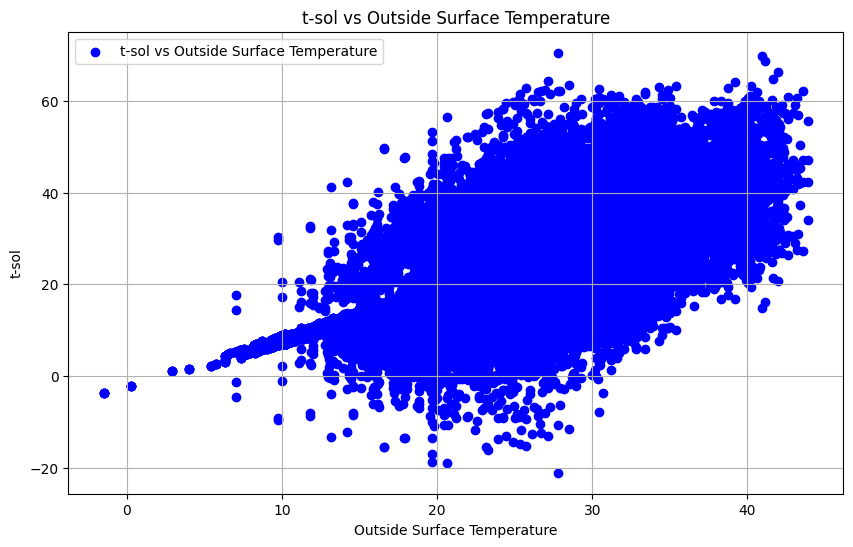

In [22]:

# Assuming data is your pandas DataFrame
plt.figure(figsize=(10, 6))
plt.scatter(X['[1] Site Outdoor Air Drybulb Temperature  (C)'], X['T-sol'], color='blue', label='t-sol vs Outside Surface Temperature')
plt.title('t-sol vs Outside Surface Temperature')
plt.xlabel('Outside Surface Temperature')
plt.ylabel('t-sol')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# prd=reg.predict(X_train)

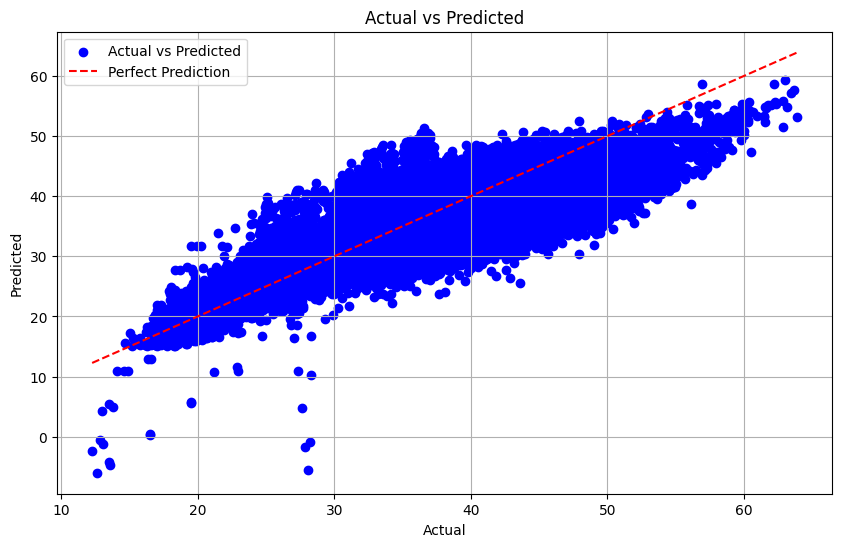

In [30]:
import matplotlib.pyplot as plt

# Assuming prd and y_train are numpy arrays
plt.figure(figsize=(10, 6))
plt.scatter(y_train, prd, color='blue', label='Actual vs Predicted')
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.grid(True)
plt.show()
